In [9]:
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

# Prepare Datasets

In [3]:
from tensorflow.keras.datasets import mnist
dataset = mnist.load_data()
(train_images, train_labels), (test_images, test_labels) = dataset

In [116]:
train_ds = tf.data.Dataset.from_tensor_slices(
    (train_images, train_labels)).shuffle(10000).batch(32)

In [122]:
data = next(iter(train_ds))

In [123]:
img, labels = data

In [124]:
img.shape

TensorShape([32, 28, 28])

# Visualize

### The difference between pytorch and tensorflow images
Tensorflow Image Shape : (28, 28)

Pytorch Image Shape: (1, 28, 28)

In [14]:
train_images[1].shape

(28, 28)

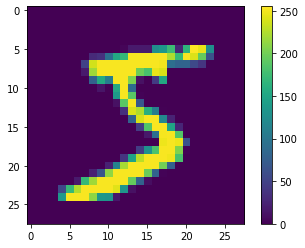

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

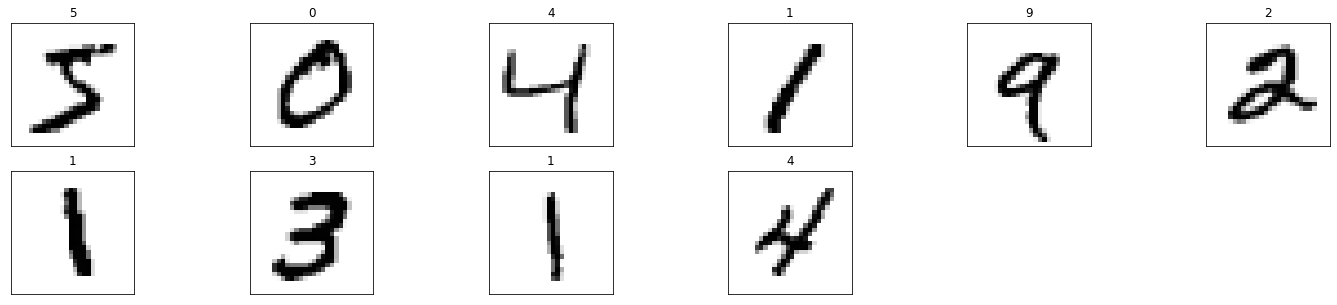

In [16]:
fig = plt.figure(figsize=(25, 5))

for i in range(10):
    ax = fig.add_subplot(2, 6, i+1, xticks=[], yticks=[])
    img = train_images[i]
    ax.imshow(img, cmap=plt.cm.binary)
    ax.set_title(str(train_labels[i].item()))

# Define Network

In [28]:
from tensorflow.keras.layers import Dense, Flatten, Dropout

In [44]:
model = keras.Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

In [45]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 128)               65664     
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
________________________________________________

# Hyper parameters

In [46]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training

In [47]:
model.fit(train_images, train_labels, epochs=6)

Train on 60000 samples
Epoch 1/6
60000/60000 [==============================] - 6s 105us/sample - loss: 1.8734 - accuracy: 0.7393
Epoch 2/6
60000/60000 [==============================] - 6s 107us/sample - loss: 0.5508 - accuracy: 0.8543
Epoch 3/6
60000/60000 [==============================] - 7s 114us/sample - loss: 0.4014 - accuracy: 0.8928
Epoch 4/6
60000/60000 [==============================] - 7s 114us/sample - loss: 0.3487 - accuracy: 0.9100
Epoch 5/6
60000/60000 [==============================] - 6s 106us/sample - loss: 0.3090 - accuracy: 0.9209
Epoch 6/6
60000/60000 [==============================] - 7s 114us/sample - loss: 0.2901 - accuracy: 0.9271


# Testing

In [49]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

10000/1 - 0s - loss: 0.1362 - accuracy: 0.9529

Test accuracy: 0.9529


# Visualize Test Result

In [111]:
images = test_images[:20]
labels = test_labels[:20]

In [112]:
output = model(images)

In [113]:
preds = tf.argmax(output, axis=1).numpy()

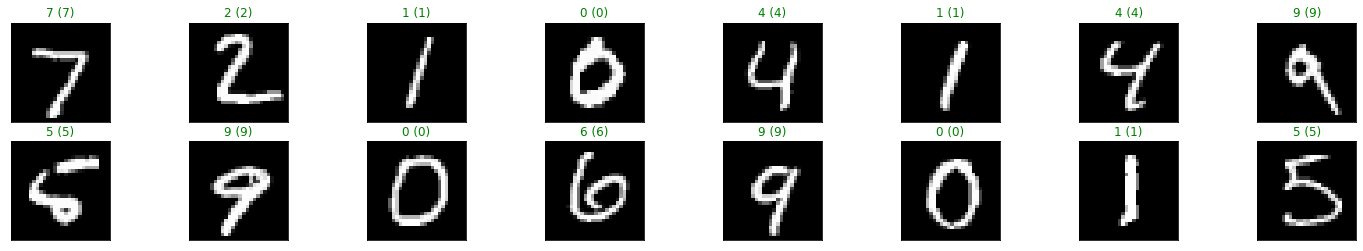

In [114]:
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(16):
    ax = fig.add_subplot(2, 8, idx+1, xticks=[], yticks=[])
    ax.imshow((images[idx]), cmap='gray')
    ax.set_title("{} ({})".format(str(preds[idx]), str(labels[idx])),
                 color=("green" if preds[idx]==labels[idx] else "red"))